In [2]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import time
import copy

In [3]:
# !git clone https://github.com/EagleVee/mask-detection

In [4]:
!ls ../experiements/dest_folder/

'ls' is not recognized as an internal or external command,
operable program or batch file.


### Creating image datasets an data loaders for train and test using the experiments folder split

In [5]:
experiments_path = '../experiements/dest_folder/'
data_path = '../experiements/data/'

In [6]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [7]:
def get_train_files_path(experiments_path, data_path, phase):
    if phase == 'train':
        file_name = 'train.csv'
    elif phase == 'test':
        file_name = 'test.csv'
    else:
        print("phase can only have train and test as parameter values")
        exit()
    file_path = os.path.join(experiments_path, file_name)
    train_df = pd.read_csv(file_path, delimiter=',')
    files_path = []
    fonts_class = []
    for row in train_df.iterrows():
        files_path.append(os.path.join(data_path, row[1]['class'], row[1]['filename']))
        fonts_class.append(row[1]['class'])
    
    return files_path, fonts_class

In [8]:
def copy_images_to_path(file_path, file_class, destination_dir):
    font_folder = os.path.join(destination_dir, file_class)
    if os.path.exists(font_folder) == False:
        os.makedirs(font_folder)
    
    print("File being copied from {}:{}".format(file_path, font_folder))
    shutil.copy(file_path, font_folder)
    #shutil.copyfile(file_path, font_folder)
    

In [9]:
X_train, y_train = get_train_files_path(experiments_path, data_path, phase='train')
X_test, y_test = get_train_files_path(experiments_path, data_path, phase='test')

In [10]:
train_dir = os.path.join(experiments_path, 'train')
test_dir = os.path.join(experiments_path, 'test')

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)

In [11]:
for file_path, font_class in zip(X_train, y_train):
    copy_images_to_path(file_path, font_class, train_dir)

File being copied from ../experiements/data/with_mask\0-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\10-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\100-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\101-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\103-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\104-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\105-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\107-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\108-with-mask.jpg:../

File being copied from ../experiements/data/with_mask\218-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\221-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\222-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\223-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\224-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\225-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\226-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\227-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\228-with-mask.jpg:

File being copied from ../experiements/data/with_mask\335-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\336-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\338-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\339-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\343-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\346-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\347-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\348-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\349-with-mask.jpg:

File being copied from ../experiements/data/with_mask\442-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\443-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\445-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\446-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\447-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\45-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\453-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\454-with-mask.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\455-with-mask.jpg:.

File being copied from ../experiements/data/with_mask\augmented_image_111.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_112.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_113.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_114.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_115.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_116.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_117.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_118.jpg:../experiements/dest_folder/train\with_mask
File being copied from .

File being copied from ../experiements/data/with_mask\augmented_image_181.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_182.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_183.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_184.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_185.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_186.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_187.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_188.jpg:../experiements/dest_folder/train\with_mask
File being copied from .

File being copied from ../experiements/data/with_mask\augmented_image_265.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_266.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_267.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_268.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_27.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_270.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_273.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_277.jpg:../experiements/dest_folder/train\with_mask
File being copied from ..

File being copied from ../experiements/data/with_mask\augmented_image_70.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_71.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_72.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_73.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_74.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_75.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_76.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experiements/data/with_mask\augmented_image_77.jpg:../experiements/dest_folder/train\with_mask
File being copied from ../experi

File being copied from ../experiements/data/without_mask\183.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\185.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\186.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\187.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\188.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\19.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\191.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\192.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\194.jpg:../experiements/dest_folder/train\withou

File being copied from ../experiements/data/without_mask\289.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\29.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\290.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\291.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\292.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\293.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\294.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\297.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\299.jpg:../experiements/dest_folder/train\withou

File being copied from ../experiements/data/without_mask\403.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\404.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\405.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\406.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\407.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\411.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\412.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\413.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\414.jpg:../experiements/dest_folder/train\witho

File being copied from ../experiements/data/without_mask\augmented_image_106.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_107.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_109.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_111.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_112.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_113.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_114.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_115.jpg:../experiements/dest_fo

File being copied from ../experiements/data/without_mask\augmented_image_183.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_184.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_185.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_186.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_187.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_188.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_189.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_19.jpg:../experiements/dest_fol

File being copied from ../experiements/data/without_mask\augmented_image_267.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_269.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_27.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_270.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_271.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_272.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_273.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_275.jpg:../experiements/dest_fol

File being copied from ../experiements/data/without_mask\augmented_image_60.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_61.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_62.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_63.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_64.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_65.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_66.jpg:../experiements/dest_folder/train\without_mask
File being copied from ../experiements/data/without_mask\augmented_image_67.jpg:../experiements/dest_folder/tra

In [12]:
for file_path, font_class in zip(X_test, y_test):
    copy_images_to_path(file_path, font_class, test_dir)

File being copied from ../experiements/data/with_mask\1-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\106-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\11-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\110-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\111-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\114-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\121-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\127-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\141-with-mask.jpg:../experiem

File being copied from ../experiements/data/with_mask\49-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\5-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\51-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\57-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\62-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\73-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\78-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\84-with-mask.jpg:../experiements/dest_folder/test\with_mask
File being copied from ../experiements/data/with_mask\85-with-mask.jpg:../experiements/de

File being copied from ../experiements/data/without_mask\415.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\427.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\432.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\434.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\436.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\440.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\444.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\446.jpg:../experiements/dest_folder/test\without_mask
File being copied from ../experiements/data/without_mask\447.jpg:../experiements/dest_folder/test\without_mask
F

In [13]:
image_datasets = {x: datasets.ImageFolder(os.path.join(experiments_path, x), data_transforms[x]) for x in ['train', 'test']}

In [14]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 1314
    Root location: ../experiements/dest_folder/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [15]:
image_datasets['test']

Dataset ImageFolder
    Number of datapoints: 194
    Root location: ../experiements/dest_folder/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [16]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                             batch_size=16, 
                                             shuffle=True, 
                                             num_workers=4) 
               for x in ['train', 'test']}

In [17]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x2a78ad05d90>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x2a78ad05ee0>}

In [18]:
class_names = image_datasets['train'].classes

In [19]:
class_names

['with_mask', 'without_mask']

In [20]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [21]:
device

device(type='cuda', index=0)

In [22]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}


### Visualizing images

In [23]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20,20))
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

In [24]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

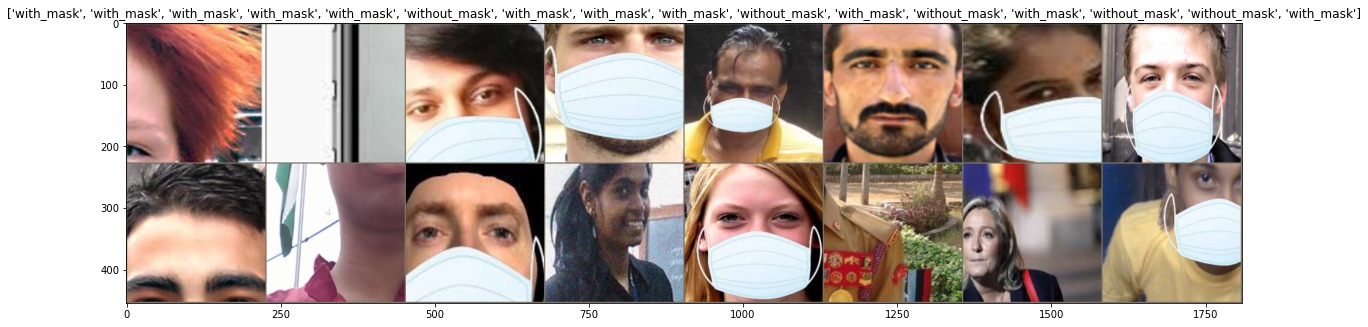

In [25]:
imshow(out, title=[class_names[x] for x in classes])

### Training the model

In [31]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()
    best_acc = 0.0
    best_model = copy.deepcopy(model.state_dict())
    
    new_freeze_state = None
    prev_freeze_state = False
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                optimizer.step()
                scheduler.step()
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
        
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
                print('Loss ', running_loss)
                print('Corrects ', running_corrects)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model.state_dict())
            
            print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model)
    return model
                

In [32]:
import ssl


In [33]:
ssl._create_default_https_context = ssl._create_unverified_context

In [41]:
# model_ft = models.resnet101(pretrained=True)

model_ft = torch.load('model/mask1_model_resnet101.pth')
num_frts = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_frts, len(class_names))

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

#optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.01, momentum=0.9)
optimizer_ft = optim.Adagrad(model_ft.parameters(), lr=0.001)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [43]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=50)

Epoch 0/49
----------
Loss  5.4529218673706055
Corrects  tensor(14, device='cuda:0')
Loss  12.261061191558838
Corrects  tensor(26, device='cuda:0')
Loss  17.90175437927246
Corrects  tensor(40, device='cuda:0')
Loss  26.064095497131348
Corrects  tensor(51, device='cuda:0')
Loss  32.56176233291626
Corrects  tensor(64, device='cuda:0')
Loss  39.535332679748535
Corrects  tensor(76, device='cuda:0')
Loss  45.03815507888794
Corrects  tensor(90, device='cuda:0')
Loss  50.91805028915405
Corrects  tensor(104, device='cuda:0')
Loss  57.93488264083862
Corrects  tensor(118, device='cuda:0')
Loss  64.63394260406494
Corrects  tensor(131, device='cuda:0')
Loss  71.86030197143555
Corrects  tensor(144, device='cuda:0')
Loss  77.14388847351074
Corrects  tensor(158, device='cuda:0')
Loss  80.73315191268921
Corrects  tensor(173, device='cuda:0')
Loss  88.22210502624512
Corrects  tensor(187, device='cuda:0')
Loss  94.25199365615845
Corrects  tensor(200, device='cuda:0')
Loss  101.81554841995239
Corrects  t

Loss  240.6003234386444
Corrects  tensor(412, device='cuda:0')
Loss  246.8538477420807
Corrects  tensor(427, device='cuda:0')
Loss  251.5666754245758
Corrects  tensor(441, device='cuda:0')
Loss  257.1981694698334
Corrects  tensor(454, device='cuda:0')
Loss  262.95566296577454
Corrects  tensor(467, device='cuda:0')
Loss  271.14019894599915
Corrects  tensor(478, device='cuda:0')
Loss  279.85540890693665
Corrects  tensor(489, device='cuda:0')
Loss  287.7612473964691
Corrects  tensor(501, device='cuda:0')
Loss  293.52189230918884
Corrects  tensor(515, device='cuda:0')
Loss  302.0724427700043
Corrects  tensor(526, device='cuda:0')
Loss  311.05685019493103
Corrects  tensor(538, device='cuda:0')
Loss  316.5464241504669
Corrects  tensor(553, device='cuda:0')
Loss  321.57569098472595
Corrects  tensor(567, device='cuda:0')
Loss  327.79535460472107
Corrects  tensor(579, device='cuda:0')
Loss  334.49009680747986
Corrects  tensor(592, device='cuda:0')
Loss  340.4474527835846
Corrects  tensor(606, d

Loss  452.67414259910583
Corrects  tensor(845, device='cuda:0')
Loss  459.4208333492279
Corrects  tensor(859, device='cuda:0')
Loss  464.4072253704071
Corrects  tensor(874, device='cuda:0')
Loss  469.18076968193054
Corrects  tensor(889, device='cuda:0')
Loss  476.47686648368835
Corrects  tensor(900, device='cuda:0')
Loss  481.4917085170746
Corrects  tensor(914, device='cuda:0')
Loss  490.52681040763855
Corrects  tensor(926, device='cuda:0')
Loss  496.532023191452
Corrects  tensor(940, device='cuda:0')
Loss  501.3295753002167
Corrects  tensor(954, device='cuda:0')
Loss  510.1543643474579
Corrects  tensor(966, device='cuda:0')
Loss  518.8615710735321
Corrects  tensor(976, device='cuda:0')
Loss  524.7288615703583
Corrects  tensor(990, device='cuda:0')
Loss  531.5558598041534
Corrects  tensor(1003, device='cuda:0')
Loss  537.8667433261871
Corrects  tensor(1016, device='cuda:0')
Loss  544.2472050189972
Corrects  tensor(1028, device='cuda:0')
Loss  550.2636802196503
Corrects  tensor(1041, de

Loss  5.253764629364014
Corrects  tensor(14, device='cuda:0')
Loss  14.507187366485596
Corrects  tensor(25, device='cuda:0')
Loss  23.477473735809326
Corrects  tensor(36, device='cuda:0')
Loss  28.386422634124756
Corrects  tensor(50, device='cuda:0')
Loss  34.62200307846069
Corrects  tensor(64, device='cuda:0')
Loss  38.82393169403076
Corrects  tensor(79, device='cuda:0')
Loss  44.448161125183105
Corrects  tensor(94, device='cuda:0')
Loss  52.33494567871094
Corrects  tensor(107, device='cuda:0')
Loss  59.33729362487793
Corrects  tensor(120, device='cuda:0')
Loss  68.95119953155518
Corrects  tensor(131, device='cuda:0')
Loss  82.34133529663086
Corrects  tensor(139, device='cuda:0')
Loss  89.57553672790527
Corrects  tensor(151, device='cuda:0')
Loss  97.45251512527466
Corrects  tensor(160, device='cuda:0')
Loss  103.36237525939941
Corrects  tensor(173, device='cuda:0')
Loss  111.35520792007446
Corrects  tensor(186, device='cuda:0')
Loss  117.80271482467651
Corrects  tensor(198, device='c

Loss  225.07808113098145
Corrects  tensor(448, device='cuda:0')
Loss  230.6592607498169
Corrects  tensor(462, device='cuda:0')
Loss  236.59904098510742
Corrects  tensor(475, device='cuda:0')
Loss  244.4304928779602
Corrects  tensor(486, device='cuda:0')
Loss  255.39804220199585
Corrects  tensor(496, device='cuda:0')
Loss  264.18519735336304
Corrects  tensor(508, device='cuda:0')
Loss  270.65858030319214
Corrects  tensor(521, device='cuda:0')
Loss  279.7882447242737
Corrects  tensor(532, device='cuda:0')
Loss  287.8629517555237
Corrects  tensor(544, device='cuda:0')
Loss  295.0381398200989
Corrects  tensor(556, device='cuda:0')
Loss  300.70515871047974
Corrects  tensor(570, device='cuda:0')
Loss  307.45279455184937
Corrects  tensor(583, device='cuda:0')
Loss  314.2310633659363
Corrects  tensor(596, device='cuda:0')
Loss  322.20531845092773
Corrects  tensor(608, device='cuda:0')
Loss  326.9078025817871
Corrects  tensor(624, device='cuda:0')
Loss  332.98004627227783
Corrects  tensor(638, 

Loss  452.0871880054474
Corrects  tensor(870, device='cuda:0')
Loss  460.6437895298004
Corrects  tensor(881, device='cuda:0')
Loss  467.38665080070496
Corrects  tensor(894, device='cuda:0')
Loss  473.4143660068512
Corrects  tensor(908, device='cuda:0')
Loss  480.4958083629608
Corrects  tensor(919, device='cuda:0')
Loss  488.87517523765564
Corrects  tensor(932, device='cuda:0')
Loss  495.5886962413788
Corrects  tensor(942, device='cuda:0')
Loss  503.03807950019836
Corrects  tensor(954, device='cuda:0')
Loss  509.11820006370544
Corrects  tensor(968, device='cuda:0')
Loss  516.0292565822601
Corrects  tensor(979, device='cuda:0')
Loss  519.3103067874908
Corrects  tensor(995, device='cuda:0')
Loss  525.6806409358978
Corrects  tensor(1009, device='cuda:0')
Loss  534.512980222702
Corrects  tensor(1021, device='cuda:0')
Loss  540.3254683017731
Corrects  tensor(1035, device='cuda:0')
Loss  546.9273865222931
Corrects  tensor(1047, device='cuda:0')
Loss  551.2705414295197
Corrects  tensor(1061, d

Loss  18.324623584747314
Corrects  tensor(21, device='cuda:0')
Loss  26.354430675506592
Corrects  tensor(32, device='cuda:0')
Loss  30.27601456642151
Corrects  tensor(47, device='cuda:0')
Loss  35.98256516456604
Corrects  tensor(61, device='cuda:0')
Loss  40.82409167289734
Corrects  tensor(76, device='cuda:0')
Loss  47.045424699783325
Corrects  tensor(89, device='cuda:0')
Loss  58.20472741127014
Corrects  tensor(99, device='cuda:0')
Loss  62.86459231376648
Corrects  tensor(113, device='cuda:0')
Loss  69.99722743034363
Corrects  tensor(125, device='cuda:0')
Loss  75.3627769947052
Corrects  tensor(138, device='cuda:0')
Loss  82.29600548744202
Corrects  tensor(151, device='cuda:0')
Loss  89.10612797737122
Corrects  tensor(163, device='cuda:0')
Loss  97.13246655464172
Corrects  tensor(175, device='cuda:0')
Loss  101.88756775856018
Corrects  tensor(189, device='cuda:0')
Loss  109.73110222816467
Corrects  tensor(203, device='cuda:0')
Loss  115.85731434822083
Corrects  tensor(215, device='cud

Loss  242.9349365234375
Corrects  tensor(450, device='cuda:0')
Loss  250.63619899749756
Corrects  tensor(463, device='cuda:0')
Loss  255.94442415237427
Corrects  tensor(479, device='cuda:0')
Loss  262.78109788894653
Corrects  tensor(492, device='cuda:0')
Loss  271.7306008338928
Corrects  tensor(504, device='cuda:0')
Loss  280.53595304489136
Corrects  tensor(518, device='cuda:0')
Loss  286.90735960006714
Corrects  tensor(530, device='cuda:0')
Loss  293.321656703949
Corrects  tensor(542, device='cuda:0')
Loss  301.4152207374573
Corrects  tensor(554, device='cuda:0')
Loss  312.6668210029602
Corrects  tensor(561, device='cuda:0')
Loss  320.9133105278015
Corrects  tensor(572, device='cuda:0')
Loss  328.70810985565186
Corrects  tensor(585, device='cuda:0')
Loss  340.76687717437744
Corrects  tensor(594, device='cuda:0')
Loss  345.28413438796997
Corrects  tensor(608, device='cuda:0')
Loss  351.2653594017029
Corrects  tensor(621, device='cuda:0')
Loss  357.2682785987854
Corrects  tensor(635, de

Loss  475.0452358722687
Corrects  tensor(852, device='cuda:0')
Loss  481.3305718898773
Corrects  tensor(863, device='cuda:0')
Loss  488.7750804424286
Corrects  tensor(875, device='cuda:0')
Loss  495.32718300819397
Corrects  tensor(887, device='cuda:0')
Loss  501.2385289669037
Corrects  tensor(900, device='cuda:0')
Loss  509.31396746635437
Corrects  tensor(912, device='cuda:0')
Loss  514.0655429363251
Corrects  tensor(927, device='cuda:0')
Loss  521.4946973323822
Corrects  tensor(940, device='cuda:0')
Loss  526.1789934635162
Corrects  tensor(955, device='cuda:0')
Loss  531.6710169315338
Corrects  tensor(969, device='cuda:0')
Loss  538.2513315677643
Corrects  tensor(981, device='cuda:0')
Loss  544.9574363231659
Corrects  tensor(995, device='cuda:0')
Loss  551.2462065219879
Corrects  tensor(1009, device='cuda:0')
Loss  555.2690589427948
Corrects  tensor(1024, device='cuda:0')
Loss  560.645512342453
Corrects  tensor(1038, device='cuda:0')
Loss  564.1295285224915
Corrects  tensor(1053, devi

Loss  15.117051124572754
Corrects  tensor(23, device='cuda:0')
Loss  21.902112007141113
Corrects  tensor(37, device='cuda:0')
Loss  27.01024293899536
Corrects  tensor(53, device='cuda:0')
Loss  33.95808982849121
Corrects  tensor(66, device='cuda:0')
Loss  40.407527446746826
Corrects  tensor(79, device='cuda:0')
Loss  46.64037084579468
Corrects  tensor(93, device='cuda:0')
Loss  51.51936864852905
Corrects  tensor(108, device='cuda:0')
Loss  59.862160205841064
Corrects  tensor(119, device='cuda:0')
Loss  67.60487079620361
Corrects  tensor(131, device='cuda:0')
Loss  72.34607028961182
Corrects  tensor(145, device='cuda:0')
Loss  83.64266014099121
Corrects  tensor(156, device='cuda:0')
Loss  89.42020845413208
Corrects  tensor(168, device='cuda:0')
Loss  95.39897537231445
Corrects  tensor(182, device='cuda:0')
Loss  102.2540831565857
Corrects  tensor(195, device='cuda:0')
Loss  111.04717969894409
Corrects  tensor(208, device='cuda:0')
Loss  121.09800672531128
Corrects  tensor(216, device='c

Loss  244.01014614105225
Corrects  tensor(430, device='cuda:0')
Loss  249.84711933135986
Corrects  tensor(444, device='cuda:0')
Loss  254.80358839035034
Corrects  tensor(459, device='cuda:0')
Loss  258.8174157142639
Corrects  tensor(475, device='cuda:0')
Loss  265.44603395462036
Corrects  tensor(487, device='cuda:0')
Loss  272.34066915512085
Corrects  tensor(500, device='cuda:0')
Loss  280.6124835014343
Corrects  tensor(512, device='cuda:0')
Loss  286.68452310562134
Corrects  tensor(527, device='cuda:0')
Loss  293.6066861152649
Corrects  tensor(540, device='cuda:0')
Loss  300.98598766326904
Corrects  tensor(551, device='cuda:0')
Loss  305.7272791862488
Corrects  tensor(566, device='cuda:0')
Loss  316.1401333808899
Corrects  tensor(576, device='cuda:0')
Loss  324.5248017311096
Corrects  tensor(589, device='cuda:0')
Loss  332.18721055984497
Corrects  tensor(602, device='cuda:0')
Loss  337.37588834762573
Corrects  tensor(615, device='cuda:0')
Loss  343.3817262649536
Corrects  tensor(630, 

Loss  478.6914601325989
Corrects  tensor(847, device='cuda:0')
Loss  491.7073359489441
Corrects  tensor(855, device='cuda:0')
Loss  498.0255055427551
Corrects  tensor(868, device='cuda:0')
Loss  506.9666199684143
Corrects  tensor(879, device='cuda:0')
Loss  511.6158323287964
Corrects  tensor(893, device='cuda:0')
Loss  517.3714032173157
Corrects  tensor(906, device='cuda:0')
Loss  525.1573481559753
Corrects  tensor(918, device='cuda:0')
Loss  532.6854615211487
Corrects  tensor(931, device='cuda:0')
Loss  537.0676531791687
Corrects  tensor(945, device='cuda:0')
Loss  542.7981777191162
Corrects  tensor(958, device='cuda:0')
Loss  550.6328735351562
Corrects  tensor(970, device='cuda:0')
Loss  555.5853719711304
Corrects  tensor(985, device='cuda:0')
Loss  564.2686433792114
Corrects  tensor(998, device='cuda:0')
Loss  570.4065899848938
Corrects  tensor(1010, device='cuda:0')
Loss  577.9438281059265
Corrects  tensor(1021, device='cuda:0')
Loss  582.7169027328491
Corrects  tensor(1035, device

Loss  18.755844116210938
Corrects  tensor(41, device='cuda:0')
Loss  24.491867542266846
Corrects  tensor(55, device='cuda:0')
Loss  30.175553798675537
Corrects  tensor(69, device='cuda:0')
Loss  37.23885440826416
Corrects  tensor(82, device='cuda:0')
Loss  41.17331385612488
Corrects  tensor(97, device='cuda:0')
Loss  48.32221722602844
Corrects  tensor(109, device='cuda:0')
Loss  55.52537226676941
Corrects  tensor(123, device='cuda:0')
Loss  63.21672511100769
Corrects  tensor(132, device='cuda:0')
Loss  70.62754321098328
Corrects  tensor(144, device='cuda:0')
Loss  80.8176200389862
Corrects  tensor(155, device='cuda:0')
Loss  87.56356310844421
Corrects  tensor(168, device='cuda:0')
Loss  94.97084307670593
Corrects  tensor(181, device='cuda:0')
Loss  102.24203276634216
Corrects  tensor(193, device='cuda:0')
Loss  107.20073390007019
Corrects  tensor(207, device='cuda:0')
Loss  115.76499342918396
Corrects  tensor(217, device='cuda:0')
Loss  121.46349215507507
Corrects  tensor(231, device='

Loss  242.09914565086365
Corrects  tensor(466, device='cuda:0')
Loss  249.62338757514954
Corrects  tensor(477, device='cuda:0')
Loss  253.89231181144714
Corrects  tensor(492, device='cuda:0')
Loss  261.9692761898041
Corrects  tensor(504, device='cuda:0')
Loss  266.48322081565857
Corrects  tensor(518, device='cuda:0')
Loss  274.63218092918396
Corrects  tensor(532, device='cuda:0')
Loss  282.12731862068176
Corrects  tensor(544, device='cuda:0')
Loss  288.8716380596161
Corrects  tensor(558, device='cuda:0')
Loss  294.1811316013336
Corrects  tensor(572, device='cuda:0')
Loss  299.9405496120453
Corrects  tensor(585, device='cuda:0')
Loss  304.99033284187317
Corrects  tensor(599, device='cuda:0')
Loss  311.7067391872406
Corrects  tensor(611, device='cuda:0')
Loss  318.00225472450256
Corrects  tensor(624, device='cuda:0')
Loss  325.83516478538513
Corrects  tensor(635, device='cuda:0')
Loss  331.9902937412262
Corrects  tensor(647, device='cuda:0')
Loss  338.8065016269684
Corrects  tensor(658, 

Loss  470.1023106575012
Corrects  tensor(873, device='cuda:0')
Loss  477.59242057800293
Corrects  tensor(886, device='cuda:0')
Loss  482.5979046821594
Corrects  tensor(901, device='cuda:0')
Loss  488.2263321876526
Corrects  tensor(915, device='cuda:0')
Loss  495.9178524017334
Corrects  tensor(926, device='cuda:0')
Loss  505.70780658721924
Corrects  tensor(935, device='cuda:0')
Loss  514.3432493209839
Corrects  tensor(945, device='cuda:0')
Loss  521.9169044494629
Corrects  tensor(957, device='cuda:0')
Loss  528.4178705215454
Corrects  tensor(970, device='cuda:0')
Loss  533.6742343902588
Corrects  tensor(983, device='cuda:0')
Loss  539.9723834991455
Corrects  tensor(997, device='cuda:0')
Loss  546.4584064483643
Corrects  tensor(1011, device='cuda:0')
Loss  553.7721333503723
Corrects  tensor(1025, device='cuda:0')
Loss  563.7780289649963
Corrects  tensor(1036, device='cuda:0')
Loss  571.2109718322754
Corrects  tensor(1048, device='cuda:0')
Loss  571.7152911424637
Corrects  tensor(1050, de

Loss  41.53761100769043
Corrects  tensor(38, device='cuda:0')
Loss  47.646846294403076
Corrects  tensor(52, device='cuda:0')
Loss  55.016716957092285
Corrects  tensor(64, device='cuda:0')
Loss  63.778849601745605
Corrects  tensor(75, device='cuda:0')
Loss  73.02942180633545
Corrects  tensor(85, device='cuda:0')
Loss  79.70147514343262
Corrects  tensor(99, device='cuda:0')
Loss  84.08470439910889
Corrects  tensor(114, device='cuda:0')
Loss  94.9290771484375
Corrects  tensor(126, device='cuda:0')
Loss  103.03733444213867
Corrects  tensor(137, device='cuda:0')
Loss  108.35003709793091
Corrects  tensor(152, device='cuda:0')
Loss  114.85841608047485
Corrects  tensor(165, device='cuda:0')
Loss  122.25616216659546
Corrects  tensor(177, device='cuda:0')
Loss  129.20506525039673
Corrects  tensor(190, device='cuda:0')
Loss  134.92945957183838
Corrects  tensor(204, device='cuda:0')
Loss  143.47970390319824
Corrects  tensor(216, device='cuda:0')
Loss  147.92420768737793
Corrects  tensor(231, devic

Loss  259.1782395839691
Corrects  tensor(481, device='cuda:0')
Loss  265.6534926891327
Corrects  tensor(495, device='cuda:0')
Loss  273.20842719078064
Corrects  tensor(505, device='cuda:0')
Loss  282.63208842277527
Corrects  tensor(517, device='cuda:0')
Loss  290.01035952568054
Corrects  tensor(531, device='cuda:0')
Loss  298.3662326335907
Corrects  tensor(544, device='cuda:0')
Loss  305.0468318462372
Corrects  tensor(555, device='cuda:0')
Loss  315.8833453655243
Corrects  tensor(564, device='cuda:0')
Loss  322.82333159446716
Corrects  tensor(576, device='cuda:0')
Loss  331.4008548259735
Corrects  tensor(589, device='cuda:0')
Loss  337.3374516963959
Corrects  tensor(603, device='cuda:0')
Loss  344.42714953422546
Corrects  tensor(615, device='cuda:0')
Loss  351.65449690818787
Corrects  tensor(627, device='cuda:0')
Loss  355.16940355300903
Corrects  tensor(642, device='cuda:0')
Loss  359.3804979324341
Corrects  tensor(657, device='cuda:0')
Loss  363.9155168533325
Corrects  tensor(672, de

Loss  494.75071930885315
Corrects  tensor(890, device='cuda:0')
Loss  499.54426407814026
Corrects  tensor(906, device='cuda:0')
Loss  504.07753348350525
Corrects  tensor(920, device='cuda:0')
Loss  509.580194234848
Corrects  tensor(934, device='cuda:0')
Loss  518.4829747676849
Corrects  tensor(944, device='cuda:0')
Loss  525.9105708599091
Corrects  tensor(957, device='cuda:0')
Loss  531.0123226642609
Corrects  tensor(971, device='cuda:0')
Loss  537.0642817020416
Corrects  tensor(984, device='cuda:0')
Loss  542.8276498317719
Corrects  tensor(998, device='cuda:0')
Loss  551.2139947414398
Corrects  tensor(1010, device='cuda:0')
Loss  556.1427700519562
Corrects  tensor(1025, device='cuda:0')
Loss  568.0790169239044
Corrects  tensor(1035, device='cuda:0')
Loss  574.835191488266
Corrects  tensor(1049, device='cuda:0')
Loss  576.3670922517776
Corrects  tensor(1050, device='cuda:0')
train Loss: 0.4386 Acc:0.7991

Loss  5.180173397064209
Corrects  tensor(14, device='cuda:0')
Loss  11.2419438362

Loss  41.294864654541016
Corrects  tensor(81, device='cuda:0')
Loss  47.73124408721924
Corrects  tensor(93, device='cuda:0')
Loss  57.18370342254639
Corrects  tensor(103, device='cuda:0')
Loss  62.86417293548584
Corrects  tensor(117, device='cuda:0')
Loss  70.37740135192871
Corrects  tensor(129, device='cuda:0')
Loss  76.39649057388306
Corrects  tensor(142, device='cuda:0')
Loss  84.08652400970459
Corrects  tensor(155, device='cuda:0')
Loss  90.18366241455078
Corrects  tensor(168, device='cuda:0')
Loss  100.88931465148926
Corrects  tensor(179, device='cuda:0')
Loss  109.2804365158081
Corrects  tensor(190, device='cuda:0')
Loss  116.92894506454468
Corrects  tensor(202, device='cuda:0')
Loss  123.66895532608032
Corrects  tensor(215, device='cuda:0')
Loss  135.08578062057495
Corrects  tensor(228, device='cuda:0')
Loss  141.05762195587158
Corrects  tensor(241, device='cuda:0')
Loss  150.27074813842773
Corrects  tensor(252, device='cuda:0')
Loss  159.13065242767334
Corrects  tensor(264, dev

Loss  284.3330602645874
Corrects  tensor(490, device='cuda:0')
Loss  291.7303218841553
Corrects  tensor(502, device='cuda:0')
Loss  299.0539197921753
Corrects  tensor(513, device='cuda:0')
Loss  303.13799953460693
Corrects  tensor(528, device='cuda:0')
Loss  309.92285346984863
Corrects  tensor(540, device='cuda:0')
Loss  315.4480299949646
Corrects  tensor(553, device='cuda:0')
Loss  320.7227306365967
Corrects  tensor(567, device='cuda:0')
Loss  331.59611988067627
Corrects  tensor(577, device='cuda:0')
Loss  338.19972038269043
Corrects  tensor(588, device='cuda:0')
Loss  343.9153199195862
Corrects  tensor(602, device='cuda:0')
Loss  350.885618686676
Corrects  tensor(614, device='cuda:0')
Loss  358.834614276886
Corrects  tensor(625, device='cuda:0')
Loss  364.74311113357544
Corrects  tensor(638, device='cuda:0')
Loss  371.8647027015686
Corrects  tensor(652, device='cuda:0')
Loss  378.6324186325073
Corrects  tensor(665, device='cuda:0')
Loss  384.7396721839905
Corrects  tensor(679, device

Loss  507.625435590744
Corrects  tensor(918, device='cuda:0')
Loss  512.0532615184784
Corrects  tensor(933, device='cuda:0')
Loss  519.0854961872101
Corrects  tensor(946, device='cuda:0')
Loss  526.0845005512238
Corrects  tensor(959, device='cuda:0')
Loss  534.0594975948334
Corrects  tensor(970, device='cuda:0')
Loss  540.9275825023651
Corrects  tensor(982, device='cuda:0')
Loss  545.1423485279083
Corrects  tensor(996, device='cuda:0')
Loss  553.9317629337311
Corrects  tensor(1006, device='cuda:0')
Loss  562.0354492664337
Corrects  tensor(1017, device='cuda:0')
Loss  565.6124770641327
Corrects  tensor(1033, device='cuda:0')
Loss  573.1133902072906
Corrects  tensor(1045, device='cuda:0')
Loss  573.2982622683048
Corrects  tensor(1047, device='cuda:0')
train Loss: 0.4363 Acc:0.7968

Loss  3.915709972381592
Corrects  tensor(15, device='cuda:0')
Loss  11.453925609588623
Corrects  tensor(26, device='cuda:0')
Loss  16.563414096832275
Corrects  tensor(40, device='cuda:0')
Loss  22.110525131225

Loss  56.36852264404297
Corrects  tensor(104, device='cuda:0')
Loss  65.03041076660156
Corrects  tensor(115, device='cuda:0')
Loss  73.13714694976807
Corrects  tensor(125, device='cuda:0')
Loss  81.42430686950684
Corrects  tensor(136, device='cuda:0')
Loss  89.36871099472046
Corrects  tensor(150, device='cuda:0')
Loss  93.54906225204468
Corrects  tensor(166, device='cuda:0')
Loss  98.83710527420044
Corrects  tensor(180, device='cuda:0')
Loss  112.54501008987427
Corrects  tensor(189, device='cuda:0')
Loss  118.71176242828369
Corrects  tensor(203, device='cuda:0')
Loss  122.98395872116089
Corrects  tensor(218, device='cuda:0')
Loss  132.19048738479614
Corrects  tensor(229, device='cuda:0')
Loss  137.69750690460205
Corrects  tensor(242, device='cuda:0')
Loss  144.5951714515686
Corrects  tensor(255, device='cuda:0')
Loss  156.38921403884888
Corrects  tensor(263, device='cuda:0')
Loss  164.9380373954773
Corrects  tensor(276, device='cuda:0')
Loss  172.1179437637329
Corrects  tensor(287, dev

Loss  294.2229027748108
Corrects  tensor(515, device='cuda:0')
Loss  303.68327474594116
Corrects  tensor(525, device='cuda:0')
Loss  309.5424222946167
Corrects  tensor(538, device='cuda:0')
Loss  313.993492603302
Corrects  tensor(553, device='cuda:0')
Loss  319.47030878067017
Corrects  tensor(567, device='cuda:0')
Loss  323.9985809326172
Corrects  tensor(581, device='cuda:0')
Loss  332.9650764465332
Corrects  tensor(593, device='cuda:0')
Loss  338.9152898788452
Corrects  tensor(607, device='cuda:0')
Loss  344.67522287368774
Corrects  tensor(621, device='cuda:0')
Loss  351.8425416946411
Corrects  tensor(633, device='cuda:0')
Loss  359.9952917098999
Corrects  tensor(646, device='cuda:0')
Loss  365.80842208862305
Corrects  tensor(660, device='cuda:0')
Loss  374.54118251800537
Corrects  tensor(672, device='cuda:0')
Loss  382.0085172653198
Corrects  tensor(684, device='cuda:0')
Loss  392.31999683380127
Corrects  tensor(692, device='cuda:0')
Loss  397.90747690200806
Corrects  tensor(705, dev

Loss  508.453733921051
Corrects  tensor(945, device='cuda:0')
Loss  515.7513003349304
Corrects  tensor(957, device='cuda:0')
Loss  522.6504802703857
Corrects  tensor(970, device='cuda:0')
Loss  528.2561092376709
Corrects  tensor(985, device='cuda:0')
Loss  533.3421897888184
Corrects  tensor(998, device='cuda:0')
Loss  543.3963499069214
Corrects  tensor(1007, device='cuda:0')
Loss  553.9457473754883
Corrects  tensor(1019, device='cuda:0')
Loss  560.8290591239929
Corrects  tensor(1031, device='cuda:0')
Loss  567.3967189788818
Corrects  tensor(1044, device='cuda:0')
Loss  567.8209615945816
Corrects  tensor(1046, device='cuda:0')
train Loss: 0.4321 Acc:0.7960

Loss  3.484761953353882
Corrects  tensor(16, device='cuda:0')
Loss  11.214361906051636
Corrects  tensor(28, device='cuda:0')
Loss  16.89652991294861
Corrects  tensor(42, device='cuda:0')
Loss  26.535905599594116
Corrects  tensor(53, device='cuda:0')
Loss  33.84782528877258
Corrects  tensor(66, device='cuda:0')
Loss  39.59267830848694

Loss  71.9895601272583
Corrects  tensor(127, device='cuda:0')
Loss  78.79890584945679
Corrects  tensor(139, device='cuda:0')
Loss  90.47835493087769
Corrects  tensor(150, device='cuda:0')
Loss  97.71023797988892
Corrects  tensor(162, device='cuda:0')
Loss  106.12834215164185
Corrects  tensor(174, device='cuda:0')
Loss  114.15128660202026
Corrects  tensor(186, device='cuda:0')
Loss  120.2716965675354
Corrects  tensor(197, device='cuda:0')
Loss  124.84491062164307
Corrects  tensor(211, device='cuda:0')
Loss  131.33418655395508
Corrects  tensor(226, device='cuda:0')
Loss  141.40173625946045
Corrects  tensor(237, device='cuda:0')
Loss  147.42717695236206
Corrects  tensor(251, device='cuda:0')
Loss  152.30232286453247
Corrects  tensor(265, device='cuda:0')
Loss  160.41492128372192
Corrects  tensor(277, device='cuda:0')
Loss  170.11274766921997
Corrects  tensor(288, device='cuda:0')
Loss  176.48771953582764
Corrects  tensor(303, device='cuda:0')
Loss  183.4192476272583
Corrects  tensor(316, 

Loss  308.93107748031616
Corrects  tensor(537, device='cuda:0')
Loss  316.12610626220703
Corrects  tensor(550, device='cuda:0')
Loss  324.43194103240967
Corrects  tensor(562, device='cuda:0')
Loss  330.9429726600647
Corrects  tensor(574, device='cuda:0')
Loss  336.2602128982544
Corrects  tensor(587, device='cuda:0')
Loss  341.9702730178833
Corrects  tensor(600, device='cuda:0')
Loss  347.27184009552
Corrects  tensor(615, device='cuda:0')
Loss  356.6963720321655
Corrects  tensor(626, device='cuda:0')
Loss  365.64997386932373
Corrects  tensor(636, device='cuda:0')
Loss  371.1480097770691
Corrects  tensor(651, device='cuda:0')
Loss  377.1369643211365
Corrects  tensor(664, device='cuda:0')
Loss  383.4592328071594
Corrects  tensor(676, device='cuda:0')
Loss  392.5808730125427
Corrects  tensor(688, device='cuda:0')
Loss  402.0738015174866
Corrects  tensor(698, device='cuda:0')
Loss  410.23288106918335
Corrects  tensor(710, device='cuda:0')
Loss  415.99815034866333
Corrects  tensor(724, devic

Loss  521.8030822277069
Corrects  tensor(976, device='cuda:0')
Loss  530.6280009746552
Corrects  tensor(988, device='cuda:0')
Loss  537.2103683948517
Corrects  tensor(1001, device='cuda:0')
Loss  545.21297955513
Corrects  tensor(1014, device='cuda:0')
Loss  551.9283983707428
Corrects  tensor(1027, device='cuda:0')
Loss  559.8979513645172
Corrects  tensor(1040, device='cuda:0')
Loss  566.4092829227448
Corrects  tensor(1054, device='cuda:0')
Loss  567.5747976303101
Corrects  tensor(1056, device='cuda:0')
train Loss: 0.4319 Acc:0.8037

Loss  5.844481945037842
Corrects  tensor(14, device='cuda:0')
Loss  13.377922058105469
Corrects  tensor(26, device='cuda:0')
Loss  18.436019897460938
Corrects  tensor(39, device='cuda:0')
Loss  24.571173667907715
Corrects  tensor(52, device='cuda:0')
Loss  27.575897932052612
Corrects  tensor(68, device='cuda:0')
Loss  31.94438099861145
Corrects  tensor(83, device='cuda:0')
Loss  37.7148220539093
Corrects  tensor(97, device='cuda:0')
Loss  45.646491289138794

Loss  85.29678916931152
Corrects  tensor(152, device='cuda:0')
Loss  91.23689222335815
Corrects  tensor(165, device='cuda:0')
Loss  96.93609571456909
Corrects  tensor(178, device='cuda:0')
Loss  105.47471570968628
Corrects  tensor(189, device='cuda:0')
Loss  111.03487920761108
Corrects  tensor(204, device='cuda:0')
Loss  115.04488945007324
Corrects  tensor(219, device='cuda:0')
Loss  120.7658281326294
Corrects  tensor(232, device='cuda:0')
Loss  126.23879528045654
Corrects  tensor(247, device='cuda:0')
Loss  134.5521583557129
Corrects  tensor(258, device='cuda:0')
Loss  141.1751160621643
Corrects  tensor(271, device='cuda:0')
Loss  146.26620149612427
Corrects  tensor(285, device='cuda:0')
Loss  156.74282503128052
Corrects  tensor(294, device='cuda:0')
Loss  162.90314722061157
Corrects  tensor(308, device='cuda:0')
Loss  170.12546730041504
Corrects  tensor(321, device='cuda:0')
Loss  176.24011754989624
Corrects  tensor(335, device='cuda:0')
Loss  183.53555059432983
Corrects  tensor(347,

Loss  318.4699273109436
Corrects  tensor(554, device='cuda:0')
Loss  326.63645029067993
Corrects  tensor(566, device='cuda:0')
Loss  333.0324945449829
Corrects  tensor(580, device='cuda:0')
Loss  339.5098605155945
Corrects  tensor(595, device='cuda:0')
Loss  342.77965235710144
Corrects  tensor(611, device='cuda:0')
Loss  348.46990990638733
Corrects  tensor(625, device='cuda:0')
Loss  357.5606462955475
Corrects  tensor(635, device='cuda:0')
Loss  363.0954201221466
Corrects  tensor(648, device='cuda:0')
Loss  374.3921616077423
Corrects  tensor(657, device='cuda:0')
Loss  384.3372299671173
Corrects  tensor(666, device='cuda:0')
Loss  389.9249007701874
Corrects  tensor(680, device='cuda:0')
Loss  399.3610599040985
Corrects  tensor(692, device='cuda:0')
Loss  407.11680245399475
Corrects  tensor(704, device='cuda:0')
Loss  416.7803375720978
Corrects  tensor(715, device='cuda:0')
Loss  427.2765076160431
Corrects  tensor(724, device='cuda:0')
Loss  434.822692155838
Corrects  tensor(736, device

Loss  554.1216921806335
Corrects  tensor(968, device='cuda:0')
Loss  561.3563342094421
Corrects  tensor(980, device='cuda:0')
Loss  566.191240310669
Corrects  tensor(994, device='cuda:0')
Loss  572.4503221511841
Corrects  tensor(1007, device='cuda:0')
Loss  576.7681121826172
Corrects  tensor(1022, device='cuda:0')
Loss  584.0616302490234
Corrects  tensor(1034, device='cuda:0')
Loss  584.5410681962967
Corrects  tensor(1036, device='cuda:0')
train Loss: 0.4449 Acc:0.7884

Loss  8.957558631896973
Corrects  tensor(11, device='cuda:0')
Loss  13.874710083007812
Corrects  tensor(25, device='cuda:0')
Loss  21.282183170318604
Corrects  tensor(37, device='cuda:0')
Loss  27.105909824371338
Corrects  tensor(50, device='cuda:0')
Loss  34.424742221832275
Corrects  tensor(62, device='cuda:0')
Loss  38.99065017700195
Corrects  tensor(77, device='cuda:0')
Loss  49.05328845977783
Corrects  tensor(88, device='cuda:0')
Loss  54.41962289810181
Corrects  tensor(101, device='cuda:0')
Loss  61.908655643463135

Loss  92.56246423721313
Corrects  tensor(169, device='cuda:0')
Loss  101.46298456192017
Corrects  tensor(180, device='cuda:0')
Loss  108.17811489105225
Corrects  tensor(193, device='cuda:0')
Loss  113.80164003372192
Corrects  tensor(207, device='cuda:0')
Loss  123.52939939498901
Corrects  tensor(218, device='cuda:0')
Loss  132.75331830978394
Corrects  tensor(228, device='cuda:0')
Loss  137.61275243759155
Corrects  tensor(242, device='cuda:0')
Loss  143.63969373703003
Corrects  tensor(254, device='cuda:0')
Loss  152.6687502861023
Corrects  tensor(267, device='cuda:0')
Loss  159.85103225708008
Corrects  tensor(280, device='cuda:0')
Loss  168.8096408843994
Corrects  tensor(291, device='cuda:0')
Loss  175.98239946365356
Corrects  tensor(305, device='cuda:0')
Loss  183.66422700881958
Corrects  tensor(317, device='cuda:0')
Loss  190.4101881980896
Corrects  tensor(330, device='cuda:0')
Loss  197.51324892044067
Corrects  tensor(341, device='cuda:0')
Loss  201.20398807525635
Corrects  tensor(35

Loss  315.7163209915161
Corrects  tensor(587, device='cuda:0')
Loss  321.4212508201599
Corrects  tensor(601, device='cuda:0')
Loss  330.505850315094
Corrects  tensor(612, device='cuda:0')
Loss  338.7807755470276
Corrects  tensor(623, device='cuda:0')
Loss  344.937171459198
Corrects  tensor(635, device='cuda:0')
Loss  352.3159132003784
Corrects  tensor(649, device='cuda:0')
Loss  358.39807319641113
Corrects  tensor(662, device='cuda:0')
Loss  367.0368423461914
Corrects  tensor(674, device='cuda:0')
Loss  374.55501556396484
Corrects  tensor(688, device='cuda:0')
Loss  382.44270372390747
Corrects  tensor(700, device='cuda:0')
Loss  388.7010884284973
Corrects  tensor(713, device='cuda:0')
Loss  394.03419733047485
Corrects  tensor(727, device='cuda:0')
Loss  403.4814429283142
Corrects  tensor(740, device='cuda:0')
Loss  409.6554985046387
Corrects  tensor(754, device='cuda:0')
Loss  418.2184257507324
Corrects  tensor(765, device='cuda:0')
Loss  426.42013454437256
Corrects  tensor(777, device

Loss  543.5572597980499
Corrects  tensor(1012, device='cuda:0')
Loss  550.2366082668304
Corrects  tensor(1024, device='cuda:0')
Loss  557.8992111682892
Corrects  tensor(1038, device='cuda:0')
Loss  563.374832868576
Corrects  tensor(1051, device='cuda:0')
Loss  564.9775972366333
Corrects  tensor(1051, device='cuda:0')
train Loss: 0.4300 Acc:0.7998

Loss  6.677074432373047
Corrects  tensor(13, device='cuda:0')
Loss  12.422196388244629
Corrects  tensor(26, device='cuda:0')
Loss  23.912611961364746
Corrects  tensor(36, device='cuda:0')
Loss  28.675772190093994
Corrects  tensor(51, device='cuda:0')
Loss  33.997180461883545
Corrects  tensor(65, device='cuda:0')
Loss  38.511417388916016
Corrects  tensor(80, device='cuda:0')
Loss  44.45790481567383
Corrects  tensor(93, device='cuda:0')
Loss  52.75454235076904
Corrects  tensor(102, device='cuda:0')
Loss  59.87215185165405
Corrects  tensor(115, device='cuda:0')
Loss  65.36376237869263
Corrects  tensor(127, device='cuda:0')
Loss  73.1572847366333

Loss  103.52844619750977
Corrects  tensor(169, device='cuda:0')
Loss  108.1255784034729
Corrects  tensor(185, device='cuda:0')
Loss  112.68656063079834
Corrects  tensor(199, device='cuda:0')
Loss  118.0647668838501
Corrects  tensor(213, device='cuda:0')
Loss  123.61565685272217
Corrects  tensor(228, device='cuda:0')
Loss  130.33324146270752
Corrects  tensor(241, device='cuda:0')
Loss  137.1550416946411
Corrects  tensor(255, device='cuda:0')
Loss  142.5889654159546
Corrects  tensor(269, device='cuda:0')
Loss  146.98147201538086
Corrects  tensor(283, device='cuda:0')
Loss  153.09393119812012
Corrects  tensor(297, device='cuda:0')
Loss  163.39914321899414
Corrects  tensor(308, device='cuda:0')
Loss  171.51178741455078
Corrects  tensor(320, device='cuda:0')
Loss  177.11737251281738
Corrects  tensor(334, device='cuda:0')
Loss  191.38521194458008
Corrects  tensor(341, device='cuda:0')
Loss  199.24136304855347
Corrects  tensor(353, device='cuda:0')
Loss  206.28034782409668
Corrects  tensor(36

Loss  323.0578546524048
Corrects  tensor(600, device='cuda:0')
Loss  331.50963306427
Corrects  tensor(613, device='cuda:0')
Loss  337.57742404937744
Corrects  tensor(627, device='cuda:0')
Loss  346.04864025115967
Corrects  tensor(638, device='cuda:0')
Loss  354.45745944976807
Corrects  tensor(649, device='cuda:0')
Loss  360.23784923553467
Corrects  tensor(663, device='cuda:0')
Loss  368.16589975357056
Corrects  tensor(676, device='cuda:0')
Loss  376.22684049606323
Corrects  tensor(688, device='cuda:0')
Loss  385.633198261261
Corrects  tensor(698, device='cuda:0')
Loss  395.02461767196655
Corrects  tensor(708, device='cuda:0')
Loss  401.4485306739807
Corrects  tensor(720, device='cuda:0')
Loss  406.9898180961609
Corrects  tensor(733, device='cuda:0')
Loss  414.6883535385132
Corrects  tensor(746, device='cuda:0')
Loss  423.14366149902344
Corrects  tensor(758, device='cuda:0')
Loss  429.67060947418213
Corrects  tensor(771, device='cuda:0')
Loss  435.90662717819214
Corrects  tensor(785, de

Loss  579.5283000469208
Corrects  tensor(1004, device='cuda:0')
Loss  586.508866071701
Corrects  tensor(1017, device='cuda:0')
Loss  593.2761108875275
Corrects  tensor(1031, device='cuda:0')
Loss  593.9664764404297
Corrects  tensor(1033, device='cuda:0')
train Loss: 0.4520 Acc:0.7861

Loss  5.0844573974609375
Corrects  tensor(13, device='cuda:0')
Loss  12.979277610778809
Corrects  tensor(25, device='cuda:0')
Loss  17.948864936828613
Corrects  tensor(40, device='cuda:0')
Loss  25.564644813537598
Corrects  tensor(52, device='cuda:0')
Loss  30.20572566986084
Corrects  tensor(65, device='cuda:0')
Loss  34.647475242614746
Corrects  tensor(79, device='cuda:0')
Loss  39.65989637374878
Corrects  tensor(93, device='cuda:0')
Loss  47.05345439910889
Corrects  tensor(105, device='cuda:0')
Loss  50.93252682685852
Corrects  tensor(120, device='cuda:0')
Loss  58.4102303981781
Corrects  tensor(133, device='cuda:0')
Loss  65.18481707572937
Corrects  tensor(147, device='cuda:0')
Loss  70.63768744468689


Loss  111.31550884246826
Corrects  tensor(199, device='cuda:0')
Loss  118.43046140670776
Corrects  tensor(212, device='cuda:0')
Loss  127.58735799789429
Corrects  tensor(224, device='cuda:0')
Loss  131.81612253189087
Corrects  tensor(240, device='cuda:0')
Loss  137.59439134597778
Corrects  tensor(253, device='cuda:0')
Loss  146.37330961227417
Corrects  tensor(266, device='cuda:0')
Loss  154.95337343215942
Corrects  tensor(277, device='cuda:0')
Loss  162.38092136383057
Corrects  tensor(290, device='cuda:0')
Loss  171.64253044128418
Corrects  tensor(301, device='cuda:0')
Loss  182.92546939849854
Corrects  tensor(311, device='cuda:0')
Loss  191.3454761505127
Corrects  tensor(322, device='cuda:0')
Loss  198.57634782791138
Corrects  tensor(332, device='cuda:0')
Loss  203.8933253288269
Corrects  tensor(347, device='cuda:0')
Loss  210.55828428268433
Corrects  tensor(359, device='cuda:0')
Loss  217.33856630325317
Corrects  tensor(372, device='cuda:0')
Loss  227.05581140518188
Corrects  tensor(

Loss  334.8231346607208
Corrects  tensor(640, device='cuda:0')
Loss  345.6143448352814
Corrects  tensor(651, device='cuda:0')
Loss  356.06684136390686
Corrects  tensor(661, device='cuda:0')
Loss  360.4148180484772
Corrects  tensor(676, device='cuda:0')
Loss  366.0642821788788
Corrects  tensor(689, device='cuda:0')
Loss  375.2228858470917
Corrects  tensor(700, device='cuda:0')
Loss  381.4481990337372
Corrects  tensor(712, device='cuda:0')
Loss  388.9740717411041
Corrects  tensor(724, device='cuda:0')
Loss  395.83716893196106
Corrects  tensor(736, device='cuda:0')
Loss  403.4927809238434
Corrects  tensor(747, device='cuda:0')
Loss  409.5363175868988
Corrects  tensor(761, device='cuda:0')
Loss  414.8118031024933
Corrects  tensor(776, device='cuda:0')
Loss  420.6485707759857
Corrects  tensor(789, device='cuda:0')
Loss  425.3135917186737
Corrects  tensor(804, device='cuda:0')
Loss  431.4849741458893
Corrects  tensor(816, device='cuda:0')
Loss  436.8635723590851
Corrects  tensor(831, device=

In [36]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    #fig = plt.figure(figsize=(10,10))
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(preds,"predicitons")
            
            
            for j in range(inputs.size()[0]):
                images_so_far +=1
                #ax = plt.subplot(num_images//len(labels)-1, len(labels), images_so_far)
                #ax.axis('off')
                #ax.set_title('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                print('true: {} predicted: {}'.format(class_names[labels[j]], class_names[preds[j]]))
                #imshow(inputs.cpu().data[j])
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [39]:
torch.save(model_ft, 'model/mask1_model_resnet101.pth')

In [40]:
visualize_model(model_ft)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0], device='cuda:0') predicitons
true: with_mask predicted: with_mask
true: without_mask predicted: with_mask
true: with_mask predicted: with_mask
true: without_mask predicted: with_mask
true: without_mask predicted: with_mask
true: with_mask predicted: with_mask
